In [3]:
import pandas as pd 
import numpy as np 
from numpy import linspace
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
#from imblearn.combine import SMOTETomek
from collections import Counter

In [4]:
df = pd.read_csv("D:/ADSP/Hertfordshire-Constabulary/data/final-one-hot-mean-encoded.csv")
df

,LSOA_code,crime_year_2019,crime_year_2020,crime_year_2021,crime_month_1,crime_month_2,crime_month_3,crime_month_4,crime_month_5,crime_month_6,...,crime_type_Burglary,crime_type_Criminal damage and arson,crime_type_Drugs,crime_type_Possession of weapons,crime_type_Public order,crime_type_Robbery,crime_type_Theft,crime_type_Vehicle crime,crime_type_Violence and sexual offences,outcome_type
0,0.331247,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0.250000,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.123494,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0.161017,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0.192090,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120944,0.331247,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
120945,0.187500,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
120946,0.233202,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
120947,0.086957,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
x_input = df.iloc[: , :-1]
x_input

,LSOA_code,crime_year_2019,crime_year_2020,crime_year_2021,crime_month_1,crime_month_2,crime_month_3,crime_month_4,crime_month_5,crime_month_6,...,crime_month_11,crime_type_Burglary,crime_type_Criminal damage and arson,crime_type_Drugs,crime_type_Possession of weapons,crime_type_Public order,crime_type_Robbery,crime_type_Theft,crime_type_Vehicle crime,crime_type_Violence and sexual offences
0,0.331247,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0.250000,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.123494,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.161017,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.192090,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120944,0.331247,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
120945,0.187500,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
120946,0.233202,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
120947,0.086957,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
y = df["outcome_type"]
y

0         1
1         0
2         1
3         0
4         0
         ..
120944    0
120945    0
120946    0
120947    0
120948    0
Name: outcome_type, Length: 120949, dtype: int64

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_input, y, test_size=0.20, random_state=4, stratify=y) 
# using stratify to ensure no class disparity

In [8]:
y_train.value_counts()

0    78101
1    18658
Name: outcome_type, dtype: int64

In [10]:
y_test.value_counts()

0    19526
1     4664
Name: outcome_type, dtype: int64

## Modelling

### Using Grid Search CV to identify best model and parameters 

In [12]:
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,100],
            'min_samples_leaf': [10,50,100]
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': list(range(1,30)),
            'p': [1,2],
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            'max_depth':[3,5,10]
        }
    },
    "XGBClassifier": {
        "model": XGBClassifier(use_label_encoder=False, booster='gbtree',
        eval_metric = "logloss"),
        "params": {'n_estimators': range(6, 10),
        'max_depth': range(3, 8),
        'learning_rate': [.01, .2, .3, .4, .5],
        'colsample_bytree': [.7, .8, .9, 1]}
    }     
}

In [13]:
# evaluation metrics in gridsearchcv: https://scikit-learn.org/0.15/modules/model_evaluation.html

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv = 5, 
    scoring = "f1", return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_metrics = pd.DataFrame(scores, columns=['model','best_score','best_params'])

In [14]:
df_metrics

,model,best_score,best_params
0,random_forest,0.297785,"{'min_samples_leaf': 10, 'n_estimators': 1}"
1,KNN,0.356802,"{'n_neighbors': 1, 'p': 1}"
2,decision_tree,0.253979,"{'criterion': 'entropy', 'max_depth': 5}"
3,XGBClassifier,0.264298,"{'colsample_bytree': 0.9, 'learning_rate': 0.5..."


### KNN 

In [15]:
clf_knn = KNeighborsClassifier(n_neighbors=1, p=1)
clf_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1, p=1)

In [16]:
y_pred = clf_knn.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[16553  2973]
 [ 2970  1694]]


In [17]:
print(f"The F1 Score is: {f1_score(y_test, y_pred)}")
print(f"The AUC Score is: {roc_auc_score(y_test, y_pred)}")

The F1 Score is: 0.36309077269317325
The AUC Score is: 0.6054745100388644


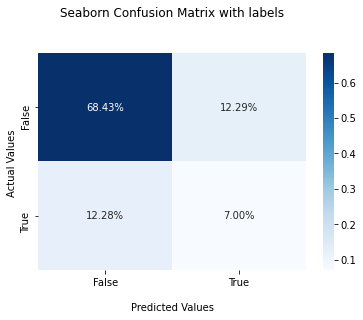

In [19]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

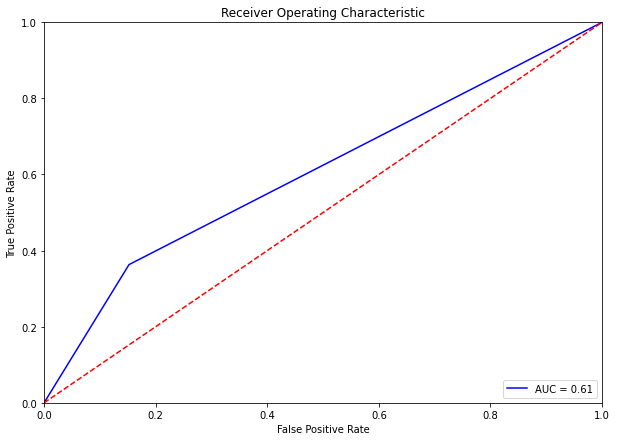

In [20]:
fig = plt.figure(figsize=(10, 7))


fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Random Forest

In [21]:
clf_rf = RandomForestClassifier(min_samples_leaf=10, n_estimators=1)
clf_rf.fit(x_train, y_train)

RandomForestClassifier(min_samples_leaf=10, n_estimators=1)

In [22]:
y_pred = clf_rf.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[18482  1044]
 [ 3629  1035]]


In [23]:
print(f"The F1 Score is: {f1_score(y_test, y_pred)}")
print(f"The AUC Score is: {roc_auc_score(y_test, y_pred)}")

The F1 Score is: 0.3069850215037817
The AUC Score is: 0.5842226747324981


In [24]:
# Using Grid Search CV to find optimum weights 

class_weight = np.linspace(0.05, 1.5, 20) # creating evenly spaced numbers 
grid_para = {'class_weight' : [{0: x, 1: 1.0-x} for x in class_weight]}

gridsearch = GridSearchCV(estimator = RandomForestClassifier(n_estimators=1, min_samples_leaf=10),
                          param_grid = grid_para,
                          scoring = 'f1',
                          cv = 5)
gridsearch.fit(x_train, y_train)
print(gridsearch.best_params_)

{'class_weight': {0: 0.20263157894736844, 1: 0.7973684210526315}}


In [25]:
clf_rf = RandomForestClassifier(min_samples_leaf=10, n_estimators=1, 
class_weight={0: 0.2789473684210526, 1: 0.7210526315789474})

clf_rf.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.2789473684210526,
                                     1: 0.7210526315789474},
                       min_samples_leaf=10, n_estimators=1)

In [26]:
y_pred = clf_rf.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[15364  4162]
 [ 2517  2147]]


In [27]:
print(f"The F1 Score is: {f1_score(y_test, y_pred)}")
print(f"The AUC Score is: {roc_auc_score(y_test, y_pred)}")

The F1 Score is: 0.3913241593001003
The AUC Score is: 0.6235913908341238


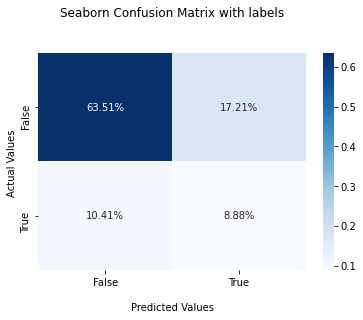

In [28]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

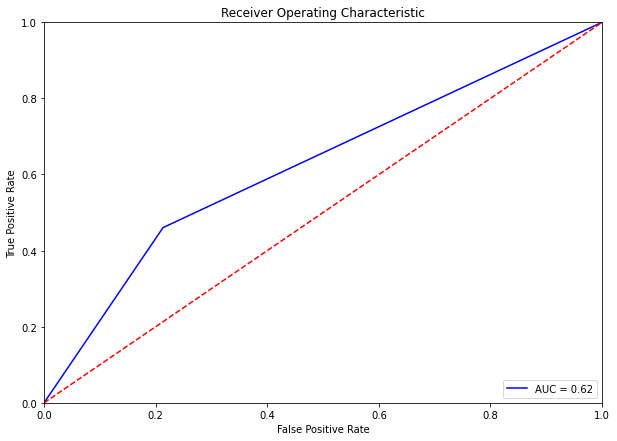

In [29]:
fig = plt.figure(figsize=(10, 7))


fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Artifical Neural Networks 

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x_input, y, test_size=0.20, random_state=4, stratify=y) 
# using stratify to ensure no class disparity

In [52]:
x_train, x_val, y_train, y_val = train_test_split(x_input, y, test_size=0.20, random_state=4, stratify=y) 
# using stratify to ensure no class disparity

In [53]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', 
                                                  classes = np.unique(y_train), 
                                                  y = y_train)
class_weights

array([0.61944789, 2.5929628 ])

In [54]:
class_weight_dict = dict(enumerate(class_weights))
class_weight_dict

{0: 0.6194478943931576, 1: 2.592962804159074}

In [55]:
from keras import backend as K

def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [56]:
metric = ['accuracy', 
          f1_metric, tf.keras.metrics.Precision(name='precision'), 
          tf.keras.metrics.Recall(name='recall'), 
          tf.keras.metrics.AUC(name='auc')]

In [57]:
def my_model():

  model = keras.Sequential([
        keras.layers.Dense(48, input_dim=24, activation='selu', 
                           kernel_initializer='he_uniform'), # initialising weights
        keras.layers.Dense(96, activation="selu"),
        keras.layers.Dense(48, activation='selu'),
        keras.layers.Dense(32, activation='selu'),
        keras.layers.Dense(32, activation='selu'),
        keras.layers.Dense(32, activation='selu'),
        keras.layers.Dense(32, activation='selu'),
        keras.layers.Dense(24, activation='selu'),
        keras.layers.Dense(24, activation='selu'),
        keras.layers.Dense(12, activation='selu'),
        keras.layers.Dense(6, activation='selu'),
        keras.layers.Dense(4, activation='selu'),
        keras.layers.Dense(2, activation='selu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

  # The optimiser is Adam with a learning rate of 0.001:
  optim = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1 = 0.9, beta_2 = 0.999, 
                                   epsilon = 10e-8, decay = 0.1, amsgrad = True)

  # The model optimises cross entropy as its loss function and will monitor classification accuracy:
  model.compile(optimizer=optim, 
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), 
                metrics=metric)

  # Printing model summary:
  print(model.summary())

  return model
print('Done!')

Done!


In [58]:
model = my_model()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 48)                1200      
_________________________________________________________________
dense_29 (Dense)             (None, 96)                4704      
_________________________________________________________________
dense_30 (Dense)             (None, 48)                4656      
_________________________________________________________________
dense_31 (Dense)             (None, 32)                1568      
_________________________________________________________________
dense_32 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_33 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_34 (Dense)             (None, 32)               

In [59]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import datetime, os

es = EarlyStopping(monitor = "val_f1_metric", mode = "max", min_delta= 0.0001, patience = 5, verbose=1)
mc = ModelCheckpoint(filepath="D:/ADSP/Hertfordshire-Constabulary/model/checkpoint", 
                     monitor="val_f1_metric", verbose=1, save_best_only= True, mode="max")

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [40]:
history = model.fit(x_train, y_train, epochs= 200, validation_data = (x_val, y_val), 
                    callbacks = [es,mc, tensorboard_callback], class_weight = class_weight_dict)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/200
3024/3024 [==============================] - 11s 3ms/step - loss: 0.6517 - accuracy: 0.6382 - f1_metric: 0.3778 - precision: 0.2894 - recall: 0.6023 - auc: 0.6606 - val_loss: 0.6405 - val_accuracy: 0.6451 - val_f1_metric: 0.3864 - val_precision: 0.2966 - val_recall: 0.6132 - val_auc: 0.6689

Epoch 00001: val_f1_metric improved from -inf to 0.38639, saving model to D:/ADSP/Hertfordshire-Constabulary/model\ann-best-model.pkl
INFO:tensorflow:Assets written to: D:/ADSP/Hertfordshire-Constabulary/model\ann-best-model.pkl\assets
Epoch 2/200
3024/3024 [==============================] - 7s 2ms/step - loss: 0.6470 - accuracy: 0.6475 - f1_metric: 0.3850 - precision: 0.2967 - recall: 0.6041 - auc: 0.6699 - val_loss: 0.6399 - val_accuracy: 0.6466 - val_f1_metric: 0.3861 - val_precision: 0.2973 - val_recall: 0.6106 - val_auc: 0.6715

Epoch 00002: val_

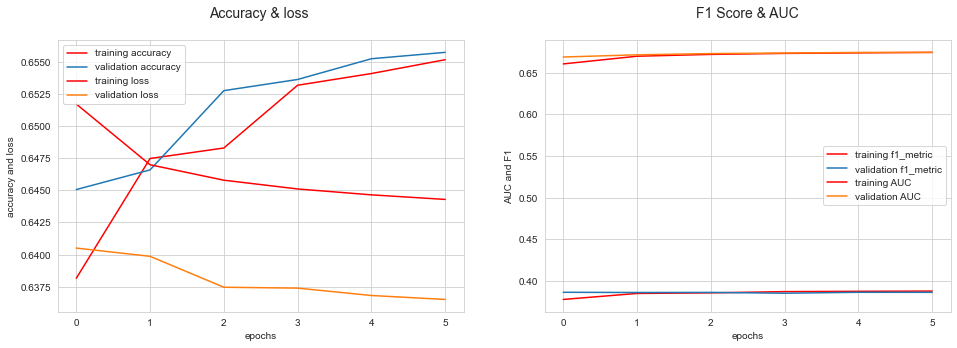

In [42]:
fig = plt.figure(figsize=(16, 5))
#  subplot #1
plt.subplot(121)
import seaborn as sns 
sns.set_style("whitegrid")
plt.plot(history.history["accuracy"], 'r', label = "training accuracy")
plt.plot(history.history["val_accuracy"], label = "validation accuracy")
plt.plot(history.history["loss"], 'r', label = "training loss")
plt.plot(history.history["val_loss"], label = "validation loss")
plt.xlabel("epochs")
plt.ylabel("accuracy and loss")
plt.title("Accuracy & loss \n", fontsize = 14)
plt.legend()

#  subplot #2
plt.subplot(122)
import seaborn as sns 
sns.set_style("whitegrid")
plt.plot(history.history["f1_metric"], 'r', label = "training f1_metric")
plt.plot(history.history["val_f1_metric"], label = "validation f1_metric")
plt.plot(history.history["auc"], 'r', label = "training AUC")
plt.plot(history.history["val_auc"], label = "validation AUC")
plt.xlabel("epochs")
plt.ylabel("AUC and F1")
plt.title("F1 Score & AUC\n", fontsize = 14)
plt.legend()

plt.show()

In [43]:
acc = model.evaluate(x_test, y_test, verbose = 1, )
print(f"The accuracy for Test Data is: {acc[1] * 100} %")

756/756 [==============================] - 1s 1ms/step - loss: 0.6365 - accuracy: 0.6557 - f1_metric: 0.3863 - precision: 0.3013 - recall: 0.5956 - auc: 0.6745
The accuracy for Test Data is: 65.57254791259766 %


In [44]:
y_pred = model.predict(x_test)
y_pred

array([[0.5394371 ],
       [0.47494054],
       [0.6281496 ],
       ...,
       [0.5027612 ],
       [0.37285656],
       [0.30449808]], dtype=float32)

In [45]:
y_pred = np.round(y_pred)
y_pred

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [46]:
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.67      0.76     19526
           1       0.30      0.60      0.40      4664

    accuracy                           0.66     24190
   macro avg       0.59      0.63      0.58     24190
weighted avg       0.76      0.66      0.69     24190



In [47]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[13084  6442]
 [ 1886  2778]]


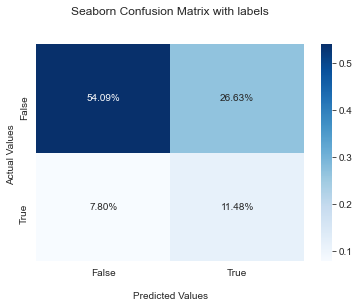

In [48]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

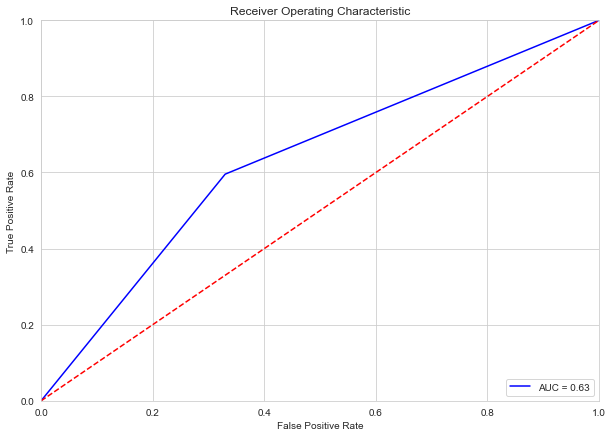

In [49]:
fig = plt.figure(figsize=(10, 7))


fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [50]:
model.save("D:/ADSP/Hertfordshire-Constabulary/model/ann-best-model")

INFO:tensorflow:Assets written to: D:/ADSP/Hertfordshire-Constabulary/model/ann-best-model\assets


In [ ]:
import keras

import optuna

# 1. Define an objective function to be maximized.
def objective(trial):
    model = Sequential()

    # 2. Suggest values of the hyperparameters using a trial object.
    model.add(
        Conv2D(filters=trial.suggest_categorical('filters', [32, 64]),
               activation=trial.suggest_categorical('activation', ['relu', 'linear']),
               input_shape=input_shape))
    model.add(Flatten())
    model.add(Dense(CLASSES, activation='softmax'))

    # We compile our model with a sampled learning rate.
    lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    optim = tf.keras.optimizers.Adam(learning_rate=lr, beta_1 = 0.9, beta_2 = 0.999, epsilon = 10e-8, decay = 0.1, amsgrad = True)
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), optimizer=optim, metrics=metric)
    ...
    return metric

# 3. Create a study object and optimize the objective function.
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)